In [57]:
### Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Cash for questions - newspaper occurences

In [58]:
df = pd.read_csv("cashforquestions_newsearch.csv")

In [59]:
import pandas as pd

# Generate a date range from '1994-01-01' to '1999-12-31'
date_range = pd.date_range(start='1994-01-01', end='1999-12-31', freq='D')

# Calculate the week numbers based on groups of 7 days
week_numbers = ((date_range - date_range[0]).days // 7) + 1

# Create an empty DataFrame with the date range as the index
empty_df = pd.DataFrame(index=date_range)

# Assign the calculated week numbers
empty_df['week'] = week_numbers

# Reset the index to make 'PubDate' a regular column
empty_df = empty_df.reset_index()

# Rename the 'index' column to 'PubDate'
empty_df = empty_df.rename(columns={'index': 'PubDate'})

print(empty_df)


        PubDate  week
0    1994-01-01     1
1    1994-01-02     1
2    1994-01-03     1
3    1994-01-04     1
4    1994-01-05     1
...         ...   ...
2186 1999-12-27   313
2187 1999-12-28   313
2188 1999-12-29   313
2189 1999-12-30   313
2190 1999-12-31   313

[2191 rows x 2 columns]


In [60]:
df.head()

,Title,Subtitle,Author,Publication,SourceType,Publisher,Volume,Issue,PubDate,AlphaDate,StartPage,EndPage,PageRange,ISSN,EISSN,ISBN,Language,DocumentUrl,DOI
0,"March 16, 2023 (Page 25)",NaN,NaN,Evening Standard (2018-),Historical Newspapers,NaN,NaN,NaN,2023-03-16,"Mar 16, 2023",25,NaN,NaN,2516-6468,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
1,Tougher media rules likely after 'cash for que...,NaN,David Hencke Westminster Correspondent,The Guardian (1959-2003),Historical Newspapers,NaN,NaN,NaN,1996-01-16,"Jan 16, 1996",8,NaN,NaN,02613077,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
2,Hamilton should go says Greer,Tatton Tories 'were misled',David Hencke Westminster Correspondent,The Guardian (1959-2003),Historical Newspapers,NaN,NaN,NaN,1997-04-14,"Apr 14, 1997",1,NaN,NaN,02613077,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
3,"July 25, 2023 (Page 22)",NaN,NaN,Evening Standard (2018-),Historical Newspapers,NaN,NaN,NaN,2023-07-25,"Jul 25, 2023",22,NaN,NaN,2516-6468,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
4,News in brief,Greer and Hamilton libel suits to be heard in ...,NaN,The Guardian (1959-2003),Historical Newspapers,NaN,NaN,NaN,1995-04-29,"Apr 29, 1995",5,NaN,NaN,02613077,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        5166 non-null   object 
 1   Subtitle     921 non-null    object 
 2   Author       1525 non-null   object 
 3   Publication  5158 non-null   object 
 4   SourceType   5158 non-null   object 
 5   Publisher    0 non-null      float64
 6   Volume       0 non-null      float64
 7   Issue        0 non-null      float64
 8   PubDate      5158 non-null   object 
 9   AlphaDate    5158 non-null   object 
 10  StartPage    5158 non-null   object 
 11  EndPage      0 non-null      float64
 12  PageRange    0 non-null      float64
 13  ISSN         5158 non-null   object 
 14  EISSN        0 non-null      float64
 15  ISBN         0 non-null      float64
 16  Language     5158 non-null   object 
 17  DocumentUrl  5158 non-null   object 
 18  DOI          0 non-null      float64
dtypes: flo

In [62]:
###convert pubdate to datetime
df['PubDate'] = pd.to_datetime(df['PubDate'], format='%Y/%m/%d')
df['PubDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5166 entries, 0 to 5165
Series name: PubDate
Non-Null Count  Dtype         
--------------  -----         
5158 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 40.5 KB


In [63]:
###sort by date
df = df.sort_values(by='PubDate')
df.head()

,Title,Subtitle,Author,Publication,SourceType,Publisher,Volume,Issue,PubDate,AlphaDate,StartPage,EndPage,PageRange,ISSN,EISSN,ISBN,Language,DocumentUrl,DOI
4152,Return to 11-plus? That's a red herring,NaN,"Hugill, Barry",The Observer (1901- 2003),Historical Newspapers,NaN,NaN,NaN,1994-01-02,"Jan 2, 1994",22,NaN,NaN,00297712,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
757,Tips for a prosperous 1994,NaN,Neasa MacErlean,The Observer (1901- 2003),Historical Newspapers,NaN,NaN,NaN,1994-01-02,"Jan 2, 1994",28,NaN,NaN,00297712,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
3725,Letter to the Editor,NaN,"Henson, J A",The Guardian (1959-2003),Historical Newspapers,NaN,NaN,NaN,1994-01-07,"Jan 7, 1994",19,NaN,NaN,02613077,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
1902,"Joy, Joy, Joy!",STEVAN KEANE on America's last but one cartoon...,"Keane, Stevan",The Guardian (1959-2003),Historical Newspapers,NaN,NaN,NaN,1994-01-08,"Jan 8, 1994",A16,NaN,NaN,02613077,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
4266,A law unto himself,"James Pickles, retired judge, author and tablo...","Chalmers, Robert",The Observer (1901- 2003),Historical Newspapers,NaN,NaN,NaN,1994-01-09,"Jan 9, 1994",E19,NaN,NaN,00297712,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN


In [64]:
# Assuming df is your DataFrame
# Filter the DataFrame to include only rows between 1962 and 1965
df = df[(df['PubDate'] >= '1994-01-01') & (df['PubDate'] <= '1999-12-31')].reset_index(drop=True)
# Sort the DataFrame by 'PubDate'
df = df.sort_values(by='PubDate')
# Add a new column 'occurrences' with a constant value of 1
df['occurrences'] = 1

In [65]:
# Selecting only the 'PubDate' and 'occurrences' columns
df = df.loc[:, ['PubDate', 'occurrences']]
df

,PubDate,occurrences
0,1994-01-02,1
1,1994-01-02,1
2,1994-01-07,1
3,1994-01-08,1
4,1994-01-09,1
...,...,...
1912,1999-12-23,1
1913,1999-12-23,1
1914,1999-12-23,1
1915,1999-12-24,1


In [66]:
# Group by 'PubDate' and sum the 'occurrences'
df = df.groupby('PubDate', as_index=False)['occurrences'].sum()
print(df)

        PubDate  occurrences
0    1994-01-02            2
1    1994-01-07            1
2    1994-01-08            1
3    1994-01-09            2
4    1994-01-11            1
...         ...          ...
1126 1999-12-21            2
1127 1999-12-22            8
1128 1999-12-23            4
1129 1999-12-24            1
1130 1999-12-31            1

[1131 rows x 2 columns]


In [67]:
# Reset the index of empty_df to have 'weeks' as a regular column
empty_df.reset_index(inplace=True)



# Merge empty_df with df based on the 'PubDate' column
merged_df = pd.merge(empty_df, df[['PubDate', 'occurrences']], on='PubDate', how='left')


# Assuming your DataFrame is named df
merged_df.rename(columns={'PubDate': 'Date'}, inplace=True)
merged_df['occurrences'] = merged_df['occurrences'].fillna(0)

print(merged_df)


      index       Date  week  occurrences
0         0 1994-01-01     1          0.0
1         1 1994-01-02     1          2.0
2         2 1994-01-03     1          0.0
3         3 1994-01-04     1          0.0
4         4 1994-01-05     1          0.0
...     ...        ...   ...          ...
2186   2186 1999-12-27   313          0.0
2187   2187 1999-12-28   313          0.0
2188   2188 1999-12-29   313          0.0
2189   2189 1999-12-30   313          0.0
2190   2190 1999-12-31   313          1.0

[2191 rows x 4 columns]


In [68]:
merged_df

,index,Date,week,occurrences
0,0,1994-01-01,1,0.0
1,1,1994-01-02,1,2.0
2,2,1994-01-03,1,0.0
3,3,1994-01-04,1,0.0
4,4,1994-01-05,1,0.0
...,...,...,...,...
2186,2186,1999-12-27,313,0.0
2187,2187,1999-12-28,313,0.0
2188,2188,1999-12-29,313,0.0
2189,2189,1999-12-30,313,0.0


In [69]:
# Filter the DataFrame where 'occurrences' is equal to 1
occurrence_1_df = merged_df[merged_df['occurrences'] != 0]

print(occurrence_1_df)

      index       Date  week  occurrences
1         1 1994-01-02     1          2.0
6         6 1994-01-07     1          1.0
7         7 1994-01-08     2          1.0
8         8 1994-01-09     2          2.0
10       10 1994-01-11     2          1.0
...     ...        ...   ...          ...
2180   2180 1999-12-21   312          2.0
2181   2181 1999-12-22   312          8.0
2182   2182 1999-12-23   312          4.0
2183   2183 1999-12-24   312          1.0
2190   2190 1999-12-31   313          1.0

[1131 rows x 4 columns]


In [70]:
merged_df.describe()

,index,week,occurrences
count,2191.000000,2191.000000,2191.000000
mean,1095.000000,157.000000,0.874943
std,632.631541,90.375483,1.200786
min,0.000000,1.000000,0.000000
25%,547.500000,79.000000,0.000000
50%,1095.000000,157.000000,1.000000
75%,1642.500000,235.000000,1.000000
max,2190.000000,313.000000,12.000000


### Add rolling occurence column - 3 day

In [71]:
merged_df['occurrences_rolling'] = merged_df['occurrences'].rolling(window=3, min_periods=1).mean()

### Add lag variable

In [72]:
merged_df['occurrences_lead1'] = merged_df['occurrences'].shift(-1)
merged_df['occurrences_lead2'] = merged_df['occurrences'].shift(-2)
merged_df['occurrences_lead3'] = merged_df['occurrences'].shift(-3)

# FTSE DATA Preprocess

## FTSE100

### Reading files

In [73]:
ftse100_1 = pd.read_csv("ftse100_1994.csv")
ftse100_2 = pd.read_csv("ftse100_1995.csv")
ftse100_3 = pd.read_csv("ftse100_1996.csv")
ftse100_4 = pd.read_csv("ftse100_1997.csv")
ftse100_5 = pd.read_csv("ftse100_1998.csv")
ftse100_6 = pd.read_csv("ftse100_1999.csv")

In [74]:
ftse100_3.tail()

,Date,Open,High,Low,Close
249,01/08/1996,"3,720.60","3,720.64","3,720.64","3,720.60"
250,01/05/1996,"3,704.50","3,704.50","3,704.50","3,704.50"
251,01/04/1996,"3,714.10","3,714.10","3,714.10","3,714.10"
252,01/03/1996,"3,715.60","3,715.60","3,715.60","3,715.60"
253,01/02/1996,"3,687.90","3,687.90","3,687.90","3,687.90"


In [75]:
###date time
ftse100_1['Date'] = pd.to_datetime(ftse100_1['Date'], format='%m/%d/%Y')
ftse100_2['Date'] = pd.to_datetime(ftse100_2['Date'], format='%m/%d/%Y')
ftse100_3['Date'] = pd.to_datetime(ftse100_3['Date'], format='%m/%d/%Y')
ftse100_4['Date'] = pd.to_datetime(ftse100_4['Date'], format='%m/%d/%Y')
ftse100_5['Date'] = pd.to_datetime(ftse100_5['Date'], format='%m/%d/%Y')
ftse100_6['Date'] = pd.to_datetime(ftse100_6['Date'], format='%m/%d/%Y')

### Combining

In [76]:
import pandas as pd

# Concatenate the DataFrames along the rows
ftse100 = pd.concat([ftse100_1, ftse100_2, ftse100_3, ftse100_4, ftse100_5, ftse100_6], ignore_index=True)

In [77]:
ftse100.tail()

,Date,Open,High,Low,Close
1514,1999-01-08,"6,147.18","6,147.18","6,147.18","6,147.18"
1515,1999-01-07,"6,101.23","6,101.23","6,101.23","6,101.23"
1516,1999-01-06,"6,148.83","6,148.83","6,148.83","6,148.83"
1517,1999-01-05,"5,958.19","5,958.19","5,958.19","5,958.19"
1518,1999-01-04,"5,879.44","5,879.40","5,879.40","5,879.44"


## Ftseall-share

### Reading files

In [78]:
ftseall_1 = pd.read_csv("ftseall_1994.csv")
ftseall_2 = pd.read_csv("ftseall_1995.csv")
ftseall_3 = pd.read_csv("ftseall_1996.csv")
ftseall_4 = pd.read_csv("ftseall_1997.csv")
ftseall_5 = pd.read_csv("ftseall_1998.csv")
ftseall_6 = pd.read_csv("ftseall_1999.csv")

In [79]:
ftseall_3.head()

,Date,Open,High,Low,Close,Volume
0,"Tuesday, December 31, 1996","2,013.66","2,013.66","2,013.66","2,013.66",0
1,"Monday, December 30, 1996","2,011.74","2,011.74","2,011.74","2,011.74",0
2,"Friday, December 27, 1996","2,001.16","2,001.16","2,001.16","2,001.16",0
3,"Tuesday, December 24, 1996","2,000.54","2,000.54","2,000.54","2,000.54",0
4,"Monday, December 23, 1996","1,998.06","1,998.06","1,998.06","1,998.06",0


In [80]:
###date time
###date time
ftseall_1['Date'] = pd.to_datetime(ftseall_1['Date'])
ftseall_2['Date'] = pd.to_datetime(ftseall_2['Date'])
ftseall_3['Date'] = pd.to_datetime(ftseall_3['Date'])
ftseall_4['Date'] = pd.to_datetime(ftseall_4['Date'])
ftseall_5['Date'] = pd.to_datetime(ftseall_5['Date'])
ftseall_6['Date'] = pd.to_datetime(ftseall_6['Date'])

### Combining

In [81]:
import pandas as pd

# Concatenate the DataFrames along the rows
ftseall = pd.concat([ftseall_1, ftseall_2, ftseall_3, ftseall_4, ftseall_5, ftseall_6], ignore_index=True)

In [82]:
ftseall.head()

,Date,Open,High,Low,Close,Volume
0,1994-12-30,"1,521.44","1,521.44","1,521.44","1,521.44",0
1,1994-12-29,"1,521.15","1,521.15","1,521.15","1,521.15",0
2,1994-12-28,"1,532.64","1,532.64","1,532.64","1,532.64",0
3,1994-12-23,"1,526.37","1,526.37","1,526.37","1,526.37",0
4,1994-12-22,"1,529.09","1,529.09","1,529.09","1,529.09",0


In [83]:
### selected desired columns
desired_columns = ['Date', 'Open', 'High', 'Low', 'Close']
ftseall = ftseall.loc[:, desired_columns]

In [84]:
###convert to date time
ftseall['Date'] = pd.to_datetime(ftseall['Date'])

In [85]:
ftseall.tail()

,Date,Open,High,Low,Close
1514,1999-01-08,"2,764.92","2,802.22","2,764.92","2,784.68"
1515,1999-01-07,"2,782.13","2,784.46","2,742.77","2,764.57"
1516,1999-01-06,"2,705.49","2,783.47","2,705.49","2,781.31"
1517,1999-01-05,"2,672.98","2,711.68","2,670.07","2,704.09"
1518,1999-01-04,"2,674.34","2,687.10","2,649.73","2,673.18"


### Combine ftse100 and ftseall

In [86]:
###drop columns
ftse100.drop(["Open", "High", "Low"], axis=1, inplace=True)
ftseall.drop(["Open", "High", "Low"], axis=1, inplace=True)
#Change ftse date column to datetime
ftse100['Date'] = pd.to_datetime(ftse100['Date'])
ftseall['Date'] = pd.to_datetime(ftseall['Date'])
#rename  ftse columns
ftse100.rename(columns={'Close': 'FTSE100'}, inplace=True)
ftseall.rename(columns={'Close': 'FTSEALL'}, inplace=True)
#combine ftse data
ftsemerge = pd.merge(ftse100, ftseall, on='Date')

In [87]:
ftsemerge = ftsemerge.drop_duplicates()

In [88]:
ftsemerge['Date'] = pd.to_datetime(ftsemerge['Date'])

In [89]:
# Replace commas in ftse data so they can be converted to float values
ftsemerge = ftsemerge.replace(',', '', regex=True)
# Convert the ftse columns from string to float
ftsemerge['FTSE100'] = pd.to_numeric(ftsemerge['FTSE100'])
ftsemerge['FTSEALL'] = pd.to_numeric(ftsemerge['FTSEALL'])

In [90]:
ftsemerge

,Date,FTSE100,FTSEALL
0,1994-12-30,3065.50,1521.44
4,1994-12-29,3065.60,1521.15
5,1994-12-28,3095.80,1532.64
6,1994-12-23,3083.40,1526.37
7,1994-12-22,3091.70,1529.09
...,...,...,...
1520,1999-01-08,6147.18,2784.68
1521,1999-01-07,6101.23,2764.57
1522,1999-01-06,6148.83,2781.31
1523,1999-01-05,5958.19,2704.09


### Combining ftse data and relevance data

In [91]:
merged_df

,index,Date,week,occurrences,occurrences_rolling,occurrences_lead1,occurrences_lead2,occurrences_lead3
0,0,1994-01-01,1,0.0,0.000000,2.0,0.0,0.0
1,1,1994-01-02,1,2.0,1.000000,0.0,0.0,0.0
2,2,1994-01-03,1,0.0,0.666667,0.0,0.0,0.0
3,3,1994-01-04,1,0.0,0.666667,0.0,0.0,1.0
4,4,1994-01-05,1,0.0,0.000000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
2186,2186,1999-12-27,313,0.0,0.000000,0.0,0.0,0.0
2187,2187,1999-12-28,313,0.0,0.000000,0.0,0.0,1.0
2188,2188,1999-12-29,313,0.0,0.000000,0.0,1.0,NaN
2189,2189,1999-12-30,313,0.0,0.000000,1.0,NaN,NaN


In [92]:
df = pd.merge(merged_df, ftsemerge, on='Date')

In [93]:
df

,index,Date,week,occurrences,occurrences_rolling,occurrences_lead1,occurrences_lead2,occurrences_lead3,FTSE100,FTSEALL
0,3,1994-01-04,1,0.0,0.666667,0.0,0.0,1.0,3408.50,1679.71
1,4,1994-01-05,1,0.0,0.000000,0.0,1.0,1.0,3379.20,1671.92
2,5,1994-01-06,1,0.0,0.000000,1.0,1.0,2.0,3403.00,1683.61
3,6,1994-01-07,1,1.0,0.333333,1.0,2.0,0.0,3446.00,1705.99
4,9,1994-01-10,2,0.0,1.000000,1.0,0.0,1.0,3440.60,1703.84
...,...,...,...,...,...,...,...,...,...,...
1510,2181,1999-12-22,312,8.0,3.333333,4.0,1.0,0.0,6728.65,3157.14
1511,2182,1999-12-23,312,4.0,4.666667,1.0,0.0,0.0,6776.81,3177.01
1512,2183,1999-12-24,312,1.0,4.333333,0.0,0.0,0.0,6806.51,3189.42
1513,2188,1999-12-29,313,0.0,0.000000,0.0,1.0,NaN,6835.91,3203.21


In [94]:
df.rename(columns={'occurrences': 'Relevance'}, inplace=True)
df.rename(columns={'occurrences_rolling_avg': 'Relevance_rolling_avg'}, inplace=True)

### Plotting graphs

### Save to CSV

In [95]:
# Assuming df is your DataFrame
df.to_csv('cashforquestions_preprocessed.csv', index=False)

### Save to stata

In [96]:
df.to_stata('cashforquestions_preprocessed.dta', version=117) 

# Looking at smaller time frames

In [97]:
# Assuming df is your DataFrame
df_sorted = df.sort_values(by='Relevance')
df_sorted.tail(10)

,index,Date,week,Relevance,occurrences_rolling,occurrences_lead1,occurrences_lead2,occurrences_lead3,FTSE100,FTSEALL
695,1005,1996-10-02,144,6.0,6.333333,3.0,3.0,3.0,4015.10,1971.32
745,1075,1996-12-11,154,6.0,3.333333,4.0,3.0,0.0,3982.50,1951.14
974,1406,1997-11-07,201,7.0,3.333333,2.0,0.0,1.0,4764.30,2265.46
1510,2181,1999-12-22,312,8.0,3.333333,4.0,1.0,0.0,6728.65,3157.14
698,1010,1996-10-07,145,8.0,5.333333,2.0,3.0,4.0,4031.50,1978.05
814,1175,1997-03-21,168,9.0,5.333333,6.0,6.0,4.0,4254.80,2078.60
206,298,1994-10-26,43,9.0,5.000000,3.0,2.0,6.0,2999.90,1496.60
723,1045,1996-11-11,150,9.0,3.333333,2.0,3.0,4.0,3914.40,1930.89
694,1004,1996-10-01,144,12.0,4.666667,6.0,3.0,3.0,3992.20,1960.67
885,1280,1997-07-04,183,12.0,5.666667,4.0,5.0,1.0,4812.80,2260.61


Timeframes to look at :\
Start of october 1994 - end of december 1994\

Start of september 1996 - end of november 1996\

Start of march 1997 - end of May 1997\

Start of July - end of November 1997\

Start of december 1999 - end of december 1999

In [98]:
###new timeframe datasets
df1 = df[(df['Date'] >= '1994-10-01') & (df['Date'] <= '1994-12-31')]
df2 = df[(df['Date'] >= '1996-09-01') & (df['Date'] <= '1996-11-30')]
df3 = df[(df['Date'] >= '1997-03-01') & (df['Date'] <= '1997-05-31')]
df4 = df[(df['Date'] >= '1997-07-01') & (df['Date'] <= '1997-11-30')]
df5 = df[(df['Date'] >= '1999-12-01') & (df['Date'] <= '1999-12-31')]

## Plotting graphs for new time frames

### TF1: Start of october 1994 - end of december 1994

In [99]:
date_format = mdates.DateFormatter('%d-%m-%Y')

In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 189 to 251
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                63 non-null     int64         
 1   Date                 63 non-null     datetime64[ns]
 2   week                 63 non-null     int64         
 3   Relevance            63 non-null     float64       
 4   occurrences_rolling  63 non-null     float64       
 5   occurrences_lead1    63 non-null     float64       
 6   occurrences_lead2    63 non-null     float64       
 7   occurrences_lead3    63 non-null     float64       
 8   FTSE100              63 non-null     float64       
 9   FTSEALL              63 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 5.4 KB


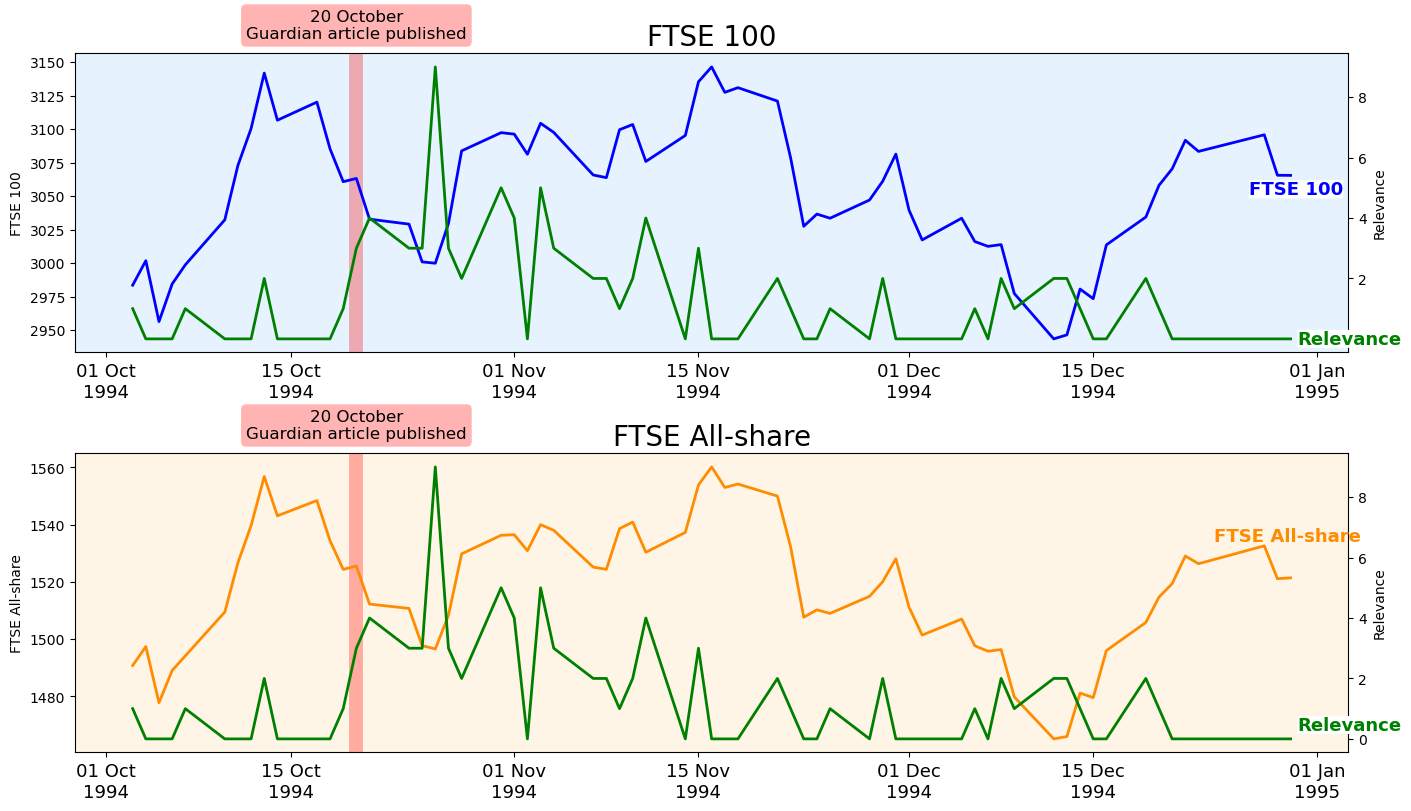

In [101]:
plt.style.use('default')
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('1994-10-20'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df1['Date'], df1['FTSE100'], label='FTSE100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df1['Date'], df1['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

##annotate
ax1_relevance.annotate('20 October\nGuardian article published',
            xy=(pd.Timestamp('1994-10-20'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df1['Date'].iloc[-1], df1['FTSE100'].iloc[-1]),
             xytext=(-30, -10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='white',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df1['Date'].iloc[-1], df1['Relevance'].iloc[-1]),
             xytext=(5, 0), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('1994-10-20'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df1['Date'], df1['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df1['Date'], df1['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)



##annotate
ax2_relevance.annotate('20 October\nGuardian article published',
            xy=(pd.Timestamp('1994-10-20'), ax2_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))


# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df1['Date'].iloc[-1], df1['FTSEALL'].iloc[-1]),
             xytext=(-55, 30), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df1['Date'].iloc[-1], df1['Relevance'].iloc[-1]),
             xytext=(5, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/ftse_cashforquestions_graph_tf1.png')  # Save the figure in the "figures" folder
plt.show()

### TF2: Start of september 1996 - end of november 1996

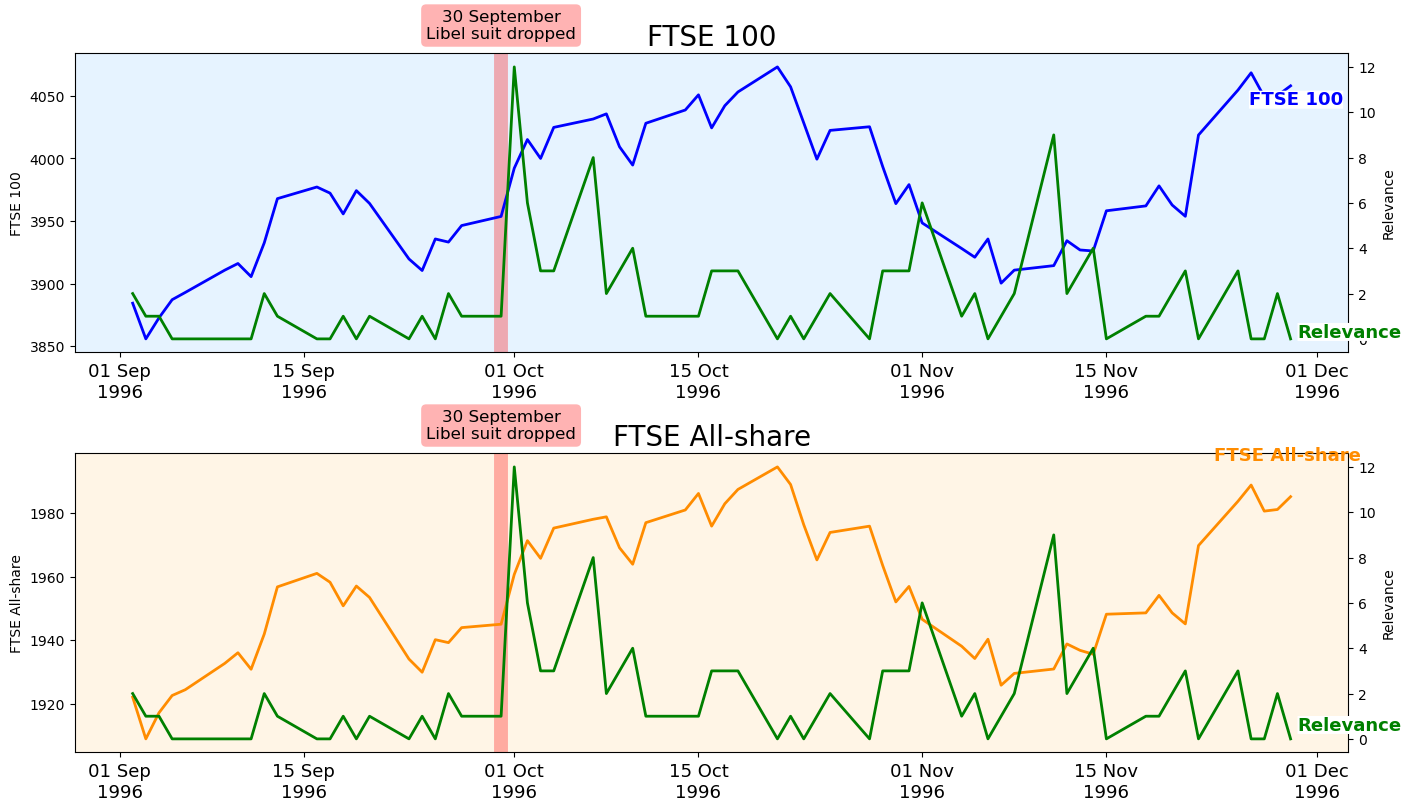

In [102]:
plt.style.use('default')
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('1996-09-30'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df2['Date'], df2['FTSE100'], label='FTSE100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df2['Date'], df2['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

##annotate
ax1_relevance.annotate('30 September\nLibel suit dropped',
            xy=(pd.Timestamp('1996-09-30'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df2['Date'].iloc[-1], df2['FTSE100'].iloc[-1]),
             xytext=(-30, -10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='white',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df2['Date'].iloc[-1], df2['Relevance'].iloc[-1]),
             xytext=(5, 5), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('1996-09-30'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df2['Date'], df2['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df2['Date'], df2['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)



##annotate
ax2_relevance.annotate('30 September\nLibel suit dropped',
            xy=(pd.Timestamp('1996-09-30'), ax2_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))


# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df2['Date'].iloc[-1], df2['FTSEALL'].iloc[-1]),
             xytext=(-55, 30), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df2['Date'].iloc[-1], df2['Relevance'].iloc[-1]),
             xytext=(5, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/ftse_cashforquestions_graph_tf2.png')  # Save the figure in the "figures" folder
plt.show()

### TF3: Start of march 1997 - end of May 1997

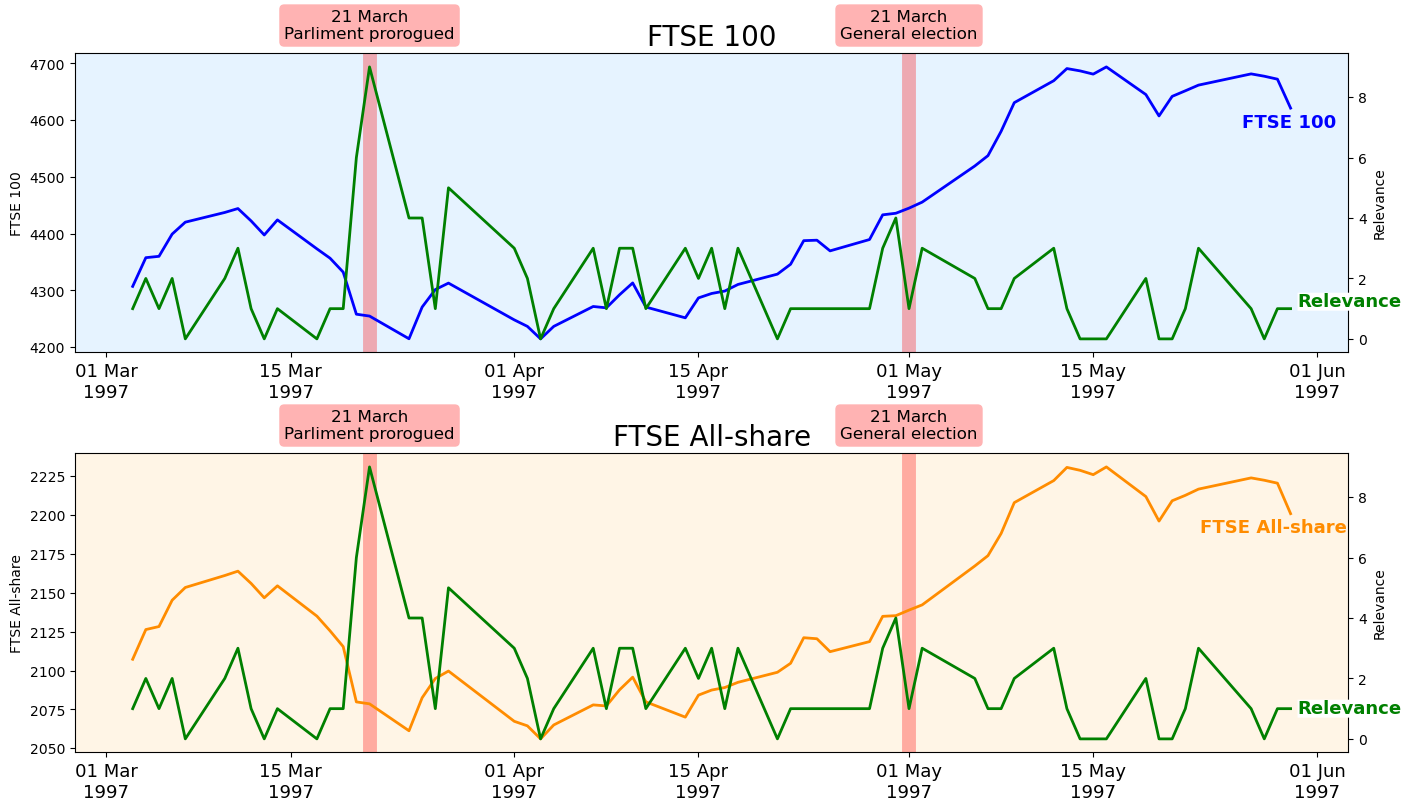

In [103]:
plt.style.use('default')
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('1997-03-21'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax1.axvline(x=pd.Timestamp('1997-05-01'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)

line1, = ax1.plot(df3['Date'], df3['FTSE100'], label='FTSE100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df3['Date'], df3['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

##annotate
ax1_relevance.annotate('21 March\nParliment prorogued',
            xy=(pd.Timestamp('1997-03-21'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))
##annotate
ax1_relevance.annotate('21 March\nGeneral election',
            xy=(pd.Timestamp('1997-05-01'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df3['Date'].iloc[-1], df3['FTSE100'].iloc[-1]),
             xytext=(-35, -10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df3['Date'].iloc[-1], df3['Relevance'].iloc[-1]),
             xytext=(5, 5), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('1997-03-21'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax2.axvline(x=pd.Timestamp('1997-05-01'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df3['Date'], df3['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df3['Date'], df3['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)



##annotate
ax2_relevance.annotate('21 March\nParliment prorogued',
            xy=(pd.Timestamp('1997-03-21'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax2_relevance.annotate('21 March\nGeneral election',
            xy=(pd.Timestamp('1997-05-01'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))


# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df3['Date'].iloc[-1], df3['FTSEALL'].iloc[-1]),
             xytext=(-65, -10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df3['Date'].iloc[-1], df3['Relevance'].iloc[-1]),
             xytext=(5, 0), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/ftse_cashforquestions_graph_tf3.png')  # Save the figure in the "figures" folder
plt.show()

### TF4: Start of July - end of November 1997

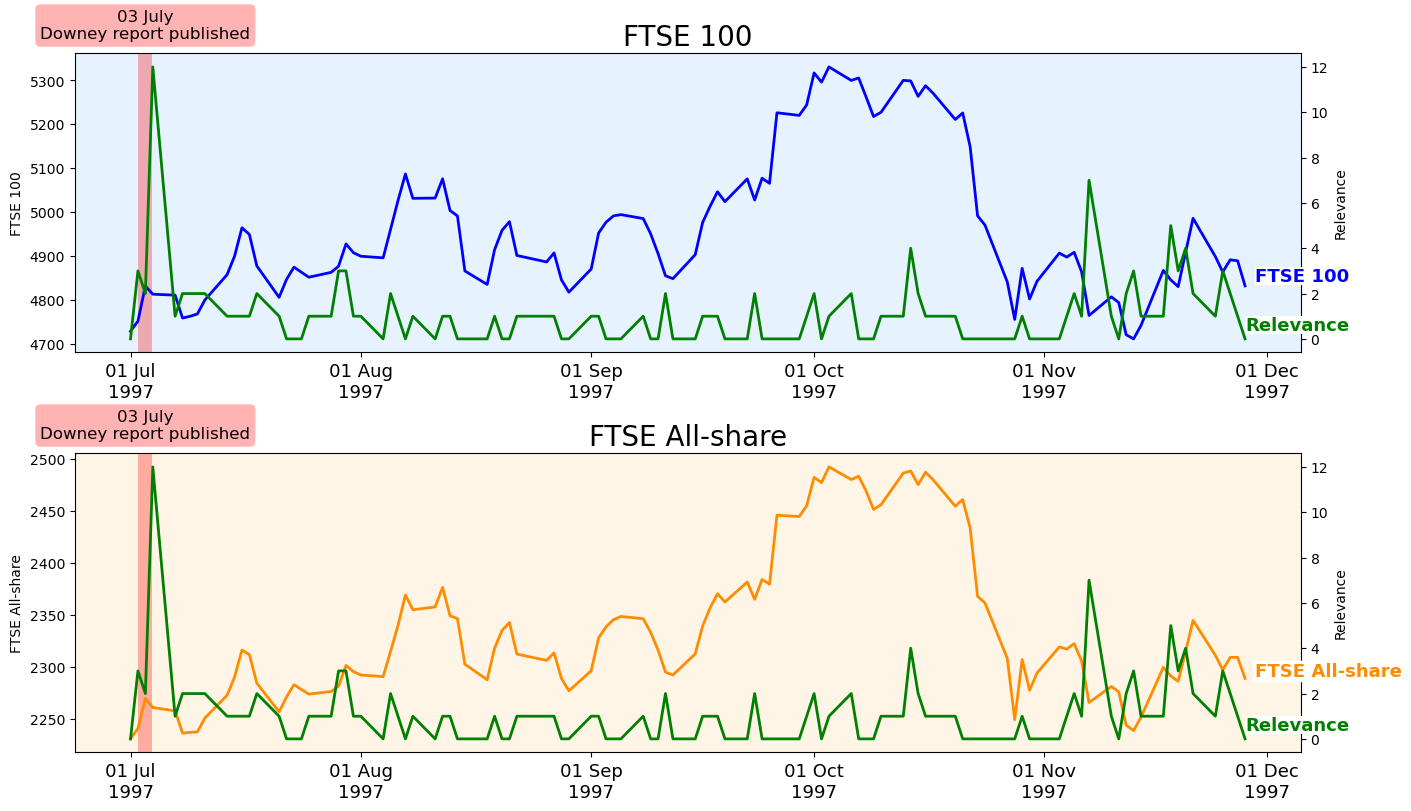

In [104]:
plt.style.use('default')
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('1997-07-03'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)

line1, = ax1.plot(df4['Date'], df4['FTSE100'], label='FTSE100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df4['Date'], df4['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

##annotate
ax1_relevance.annotate('03 July\nDowney report published',
            xy=(pd.Timestamp('1997-07-03'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df4['Date'].iloc[-1], df4['FTSE100'].iloc[-1]),
             xytext=(7, 7), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='white',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df4['Date'].iloc[-1], df4['Relevance'].iloc[-1]),
             xytext=(0, 10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('1997-07-03'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df4['Date'], df4['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df4['Date'], df4['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)



##annotate
ax2_relevance.annotate('03 July\nDowney report published',
            xy=(pd.Timestamp('1997-07-03'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df4['Date'].iloc[-1], df4['FTSEALL'].iloc[-1]),
             xytext=(7, 5), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='white',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df4['Date'].iloc[-1], df4['Relevance'].iloc[-1]),
             xytext=(0, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/ftse_cashforquestions_graph_tf4.png')  # Save the figure in the "figures" folder
plt.show()

### TF5 : Start of december 1999 - end of december 1999

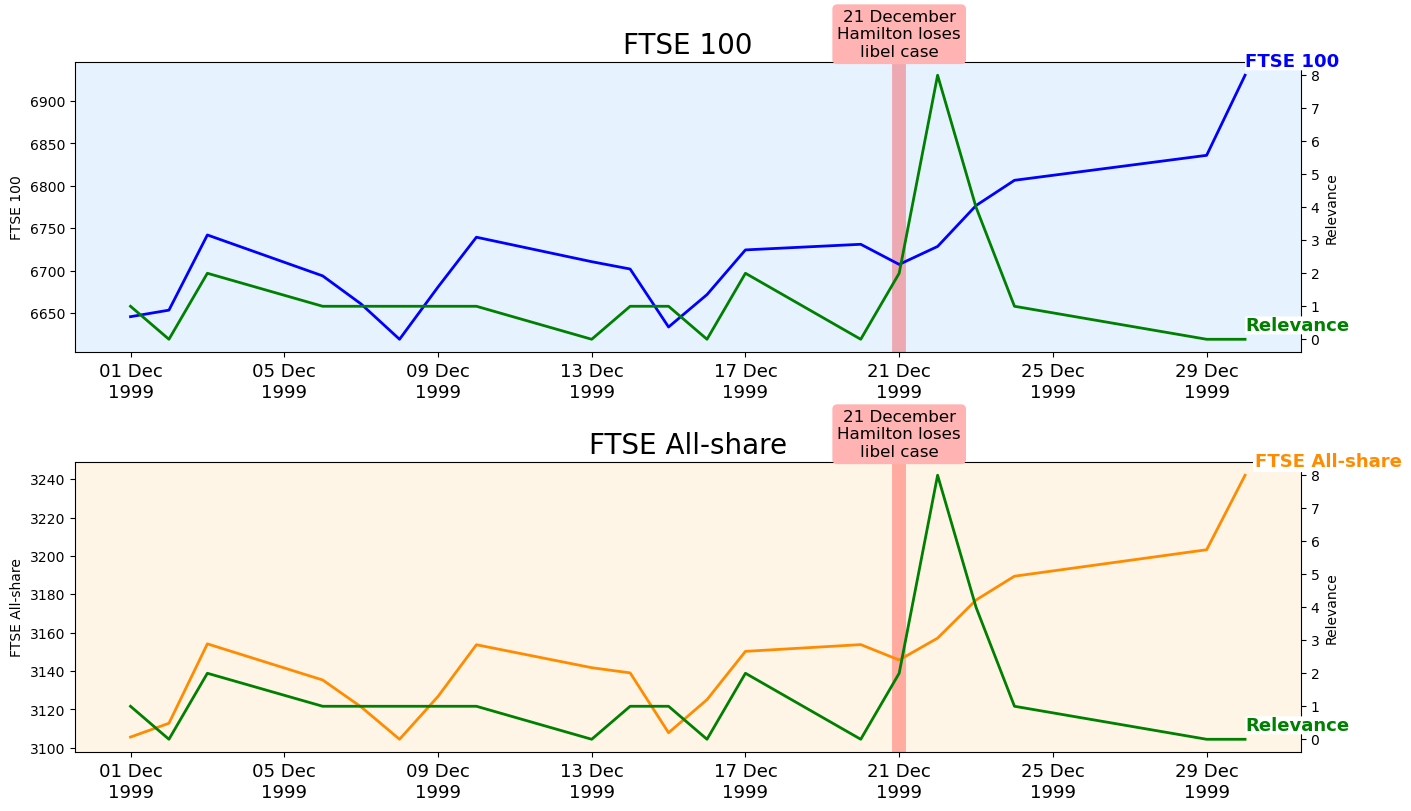

In [105]:
plt.style.use('default')
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('1999-12-21'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)

line1, = ax1.plot(df5['Date'], df5['FTSE100'], label='FTSE100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df5['Date'], df5['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)
##annotate
ax1_relevance.annotate('21 December\nHamilton loses\nlibel case',
            xy=(pd.Timestamp('1999-12-21'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df5['Date'].iloc[-1], df5['FTSE100'].iloc[-1]),
             xytext=(0, 10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='white',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df5['Date'].iloc[-1], df5['Relevance'].iloc[-1]),
             xytext=(0, 10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('1999-12-21'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df5['Date'], df5['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df5['Date'], df5['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)



##annotate
ax2_relevance.annotate('21 December\nHamilton loses\nlibel case',
            xy=(pd.Timestamp('1999-12-21'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df5['Date'].iloc[-1], df5['FTSEALL'].iloc[-1]),
             xytext=(7, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='white',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df5['Date'].iloc[-1], df5['Relevance'].iloc[-1]),
             xytext=(0, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/ftse_cashforquestions_graph_tf5.png')  # Save the figure in the "figures" folder
plt.show()

### Save to CSV

In [106]:
# Assuming df is your DataFrame
df1.to_csv('cashforquestions_preprocessed_timeframe1.csv', index=False)
df2.to_csv('cashforquestions_preprocessed_timeframe2.csv', index=False)
df3.to_csv('cashforquestions_preprocessed_timeframe3.csv', index=False)
df4.to_csv('cashforquestions_preprocessed_timeframe4.csv', index=False)
df5.to_csv('cashforquestions_preprocessed_timeframe5.csv', index=False)

### Save to stata dta

In [107]:
df1.to_stata('cashforquestions_preprocessed_timeframe1.dta', version=117)
df2.to_stata('cashforquestions_preprocessed_timeframe2.dta', version=117)
df3.to_stata('cashforquestions_preprocessed_timeframe3.dta', version=117)
df4.to_stata('cashforquestions_preprocessed_timeframe4.dta', version=117)
df5.to_stata('cashforquestions_preprocessed_timeframe5.dta', version=117)